# Objective of Sales data Analysis
    1. What is the overall sales trend?
    2. What are the top 10 products by sales?
    3. Which are the most profitable categories and sub-categories?
    4. Which is the most preferred shipment mode?
    5. Which is the most selling product?
    6. which is the least selling product?
    7. which kind of order mostly placed?
    8. which product has high shipping cost?
    9. Which product has least shipping cost?
    10. Which country has highest sales rate?
    11. Which country has lowest sales rate?
    12. how many products took longest day of shipment?
    13. Which product was purchased maximum by which customer?
    14. Which product was purchased minimum by which customer?
    15. Which product sold for max discount?
    16. Which product has more no.of discounts?
    17. Which product from which country makes high shipment cost?

In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

Importing the dataset

In [26]:
data=pd.read_excel('ECOMM DATA.xlsx')
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [27]:
data.shape

(51290, 24)

In [28]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [30]:
data['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

In [31]:
data['Order Date'].min()

Timestamp('2011-01-01 00:00:00')

In [41]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

# Exploratory Data Analysis

# 1. What is the overall Sales Trend?

In [42]:
# getting month_year
data['Month_Year']=data['Order Date'].apply(lambda x:x.strftime('%Y-%m'))

In [43]:
data['Month_Year']

0        2012-07
1        2013-02
2        2013-10
3        2013-01
4        2013-11
          ...   
51285    2014-06
51286    2014-06
51287    2013-12
51288    2012-02
51289    2012-05
Name: Month_Year, Length: 51290, dtype: object

In [45]:
# Grouping month_year by sales
sales_trend=data.groupby(data['Month_Year']).sum()['Sales'].reset_index()

In [46]:
sales_trend

,Month_Year,Sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


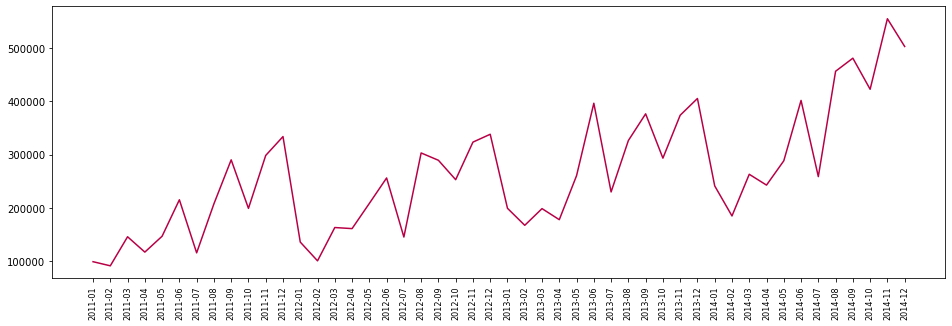

In [48]:
plt.figure(figsize=(16,5))
plt.plot(sales_trend['Month_Year'],sales_trend['Sales'],color='#b80045')
plt.xticks(rotation='vertical',size=8)
plt.show()

# 2. What are the top 10 products by sales?

In [49]:
top_product=data.groupby(['Product Name']).sum()['Sales'].reset_index()

In [51]:
top_product.sort_values(by=['Sales'],inplace=True,ascending=False)

In [54]:
top_product[:10].reset_index()

,index,Product Name,Sales
0,310,"Apple Smart Phone, Full Size",86935.7786
1,970,"Cisco Smart Phone, Full Size",76441.5306
2,2415,"Motorola Smart Phone, Full Size",73156.3030
3,2501,"Nokia Smart Phone, Full Size",71904.5555
4,866,Canon imageCLASS 2200 Advanced Copier,61599.8240
5,1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
6,2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
7,1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
8,2988,"Samsung Smart Phone, Cordless",48653.4600
9,2502,"Nokia Smart Phone, with Caller ID",47877.7857


# 3. Which are the most profitable categories and sub-categories?

In [62]:
profit_categories=pd.DataFrame(data.groupby(['Category','Sub-Category']).sum()['Profit'])

In [63]:
profit_categories.sort_values(['Category','Sub-Category'],ascending=False)

Profit
Category        Sub-Category              
Technology      Phones        216717.00580
                Machines       58867.87300
                Copiers       258567.54818
                Accessories   129626.30620
Office Supplies Supplies       22583.26310
                Storage       108461.48980
                Paper          59207.68270
                Labels         15010.51200
                Fasteners      11525.42410
                Envelopes      29601.11630
                Binders        72449.84600
                Art            57953.91090
                Appliances    141680.58940
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        140396.26750
                Bookcases     161924.41950

# 4. Which is the most preferred shipment mode?

In [83]:
data['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

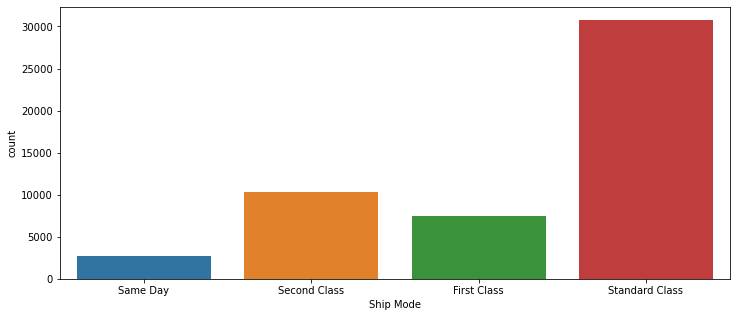

In [87]:
plt.figure(figsize=(12,5))
sns.countplot(x='Ship Mode',data=data)
plt.show()

# 5. Which is the most selling products?

In [90]:
best_selling_product=pd.DataFrame(data.groupby(['Product Name']).sum()['Quantity'])

In [91]:
best_selling_product.sort_values(by=['Quantity'],inplace=True,ascending=False)

In [92]:
best_selling_product[:10]

,Quantity
Product Name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


# 6. which is the least selling product?

In [94]:
least_selling_product=pd.DataFrame(data.groupby(['Product Name']).sum()['Quantity'])
least_selling_product.sort_values(by=['Quantity'],inplace=True,ascending=True)
least_selling_product[:10]

,Quantity
Product Name,
Penpower WorldCard Pro Card Scanner,1
Boston 1900 Electric Pencil Sharpener,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
"Chromcraft Training Table, Adjustable Height",1
Xerox 20,1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,2
Avery 5,2
Xerox 1984,2


# 7. which kind of order mostly placed?

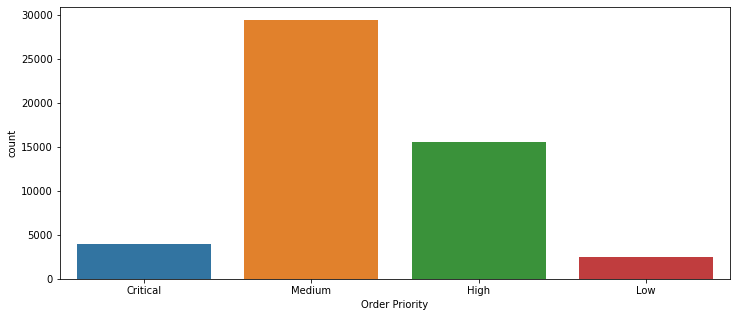

In [95]:
plt.figure(figsize=(12,5))
sns.countplot(x='Order Priority',data=data)
plt.show()

# 8. which product has high shipping cost?

In [108]:
high_shipping_cost=pd.DataFrame(data.groupby(['Product Name','Country']).sum()['Shipping Cost'])
high_shipping_cost.sort_values(by=['Shipping Cost'],inplace=True,ascending=False)
high_shipping_cost[:10]

,,Shipping Cost
Product Name,Country,
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,United States,3197.94
Hewlett Packard LaserJet 3310 Copier,United States,2764.80
HON 5400 Series Task Chairs for Big and Tall,United States,2483.01
"Nokia Smart Phone, with Caller ID",Australia,2175.47
Martin Yale Chadless Opener Electric Letter Opener,United States,1963.47
Samsung Galaxy Mega 6.3,United States,1846.51
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room,United States,1722.78
GBC DocuBind TL300 Electric Binding System,United States,1703.08
Bretford Rectangular Conference Table Tops,United States,1592.59


# 9. Which product has least shipping cost?

In [107]:
least_shipping_cost=pd.DataFrame(data.groupby(['Product Name','Country']).sum()['Shipping Cost'])
least_shipping_cost.sort_values(by=['Shipping Cost'],inplace=True,ascending=True)
least_shipping_cost[:10]

,,Shipping Cost
Product Name,Country,
"Advantus Thumb Tacks, 12 Pack",Japan,0.01
"SanDisk Message Books, 8.5 x 11",Nicaragua,0.01
"Sanford Highlighters, Easy-Erase",Zimbabwe,0.02
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,United States,0.02
"Enermax Computer Printout Paper, Multicolor",Philippines,0.03
"Cardinal Hole Reinforcements, Economy",Saudi Arabia,0.03
"Green Bar Memo Slips, Multicolor",Pakistan,0.04
"Harbour Creations File Folder Labels, 5000 Label Set",South Korea,0.04
"Ibico Binder Covers, Economy",United Kingdom,0.04


# 10. Which country has highest sales rate?

In [112]:
highest_sales_country=pd.DataFrame(data.groupby(['Country']).sum()['Sales'])
highest_sales_country.sort_values(by=['Sales'],inplace=True,ascending=False)
highest_sales_country[:10]

,Sales
Country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


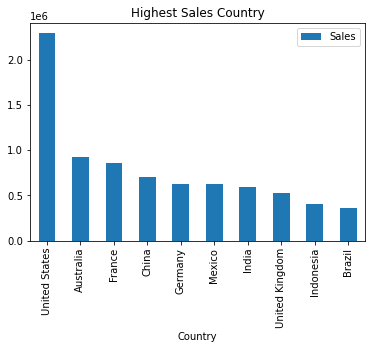

In [193]:
highest_sales_country[:10].plot.bar()
plt.title('Highest Sales Country')
plt.show()

# 11. Which country has lowest sales rate?

In [113]:
lowest_sales_country=pd.DataFrame(data.groupby(['Country']).sum()['Sales'])
lowest_sales_country.sort_values(by=['Sales'],inplace=True,ascending=True)
lowest_sales_country[:10]

,Sales
Country,
Equatorial Guinea,150.510
Armenia,156.750
Eritrea,187.740
Macedonia,209.640
Tajikistan,242.784
Burundi,267.720
Swaziland,288.030
Bahrain,669.180
United Arab Emirates,744.120


# 12. how many products took longest day of shipment?

In [121]:
data['days_took_shipment']=data['Ship Date']-data['Order Date']

In [124]:
data['days_took_shipment'].value_counts()

4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
Name: days_took_shipment, dtype: int64

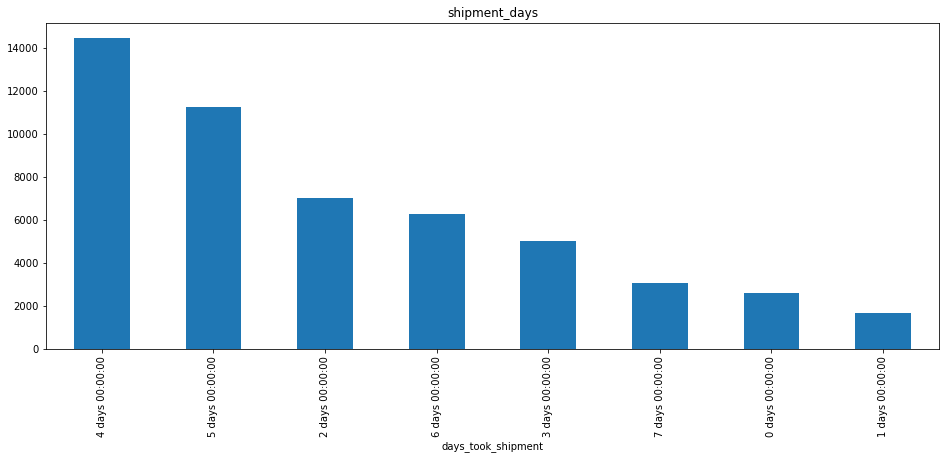

In [134]:
plt.figure(figsize=(16,6))
data['days_took_shipment'].value_counts().plot(kind='bar')
plt.title('shipment_days')
plt.xlabel('days_took_shipment')
plt.show()

# 13. Which product was purchased maximum by which customer?

In [139]:
customer_high_product=pd.DataFrame(data.groupby(['Product Name','Customer Name']).sum()['Sales'])
customer_high_product.sort_values(by=['Sales'],inplace=True,ascending=False)
customer_high_product[:10]

Sales
Product Name                                       Customer Name                
Cisco TelePresence System EX90 Videoconferencin... Sean Miller         22638.480
Canon imageCLASS 2200 Advanced Copier              Tamara Chand        17499.950
                                                   Raymond Buch        13999.960
                                                   Tom Ashbrook        11199.968
                                                   Hunter Lopez        10499.970
GBC Ibimaster 500 Manual ProClick Binding System   Adrian Barton        9892.740
Ibico EPK-21 Electric Binding System               Sanjit Chand         9449.950
3D Systems Cube Printer, 2nd Generation, Magenta   Bill Shonely         9099.930
HP Designjet T520 Inkjet Large Format Printer -... Sanjit Engle         8749.950
Canon imageCLASS 2200 Advanced Copier              Christopher Conant   8399.976

# 14. Which product was purchased minimum by which customer?

In [140]:
customer_low_product=pd.DataFrame(data.groupby(['Product Name','Customer Name']).sum()['Sales'])
customer_low_product.sort_values(by=['Sales'],inplace=True,ascending=True)
customer_low_product[:10]

,,Sales
Product Name,Customer Name,
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,Zuschuss Carroll,0.444
Acco Suede Grain Vinyl Round Ring Binder,Roland Schwarz,0.556
Avery Durable Slant Ring Binders With Label Holder,Ken Brennan,0.836
Avery Round Ring Poly Binders,Jas O'Carroll,0.852
Acco 3-Hole Punch,Henry Goldwyn,0.876
Avery Non-Stick Binders,Craig Molinari,0.898
"Avery Triangle Shaped Sheet Lifters, Black, 2/Pack",Mark Van Huff,0.984
Maxell 4.7GB DVD-R 5/Pack,Neil Knudson,0.990
Acco Economy Flexible Poly Round Ring Binder,Harry Marie,1.044


# 15. Which product sold for max discount?

In [156]:
max_discount_products=pd.DataFrame(data.groupby(['Product Name','Discount']).max()['Sales'])
max_discount_products.sort_values(by=['Discount'],inplace=True,ascending=False)
max_discount_products[:10]

,,Sales
Product Name,Discount,
"Bevis Conference Table, Fully Assembled",0.85,555.138
"Chromcraft Coffee Table, Fully Assembled",0.85,241.704
GBC VeloBinder Electric Binding Machine,0.80,96.784
Bionaire 99.97% HEPA Air Cleaner,0.80,14.016
GBC Standard Therm-A-Bind Covers,0.80,4.984
GBC Twin Loop Wire Binding Elements,0.80,33.280
Acco Smartsocket Color-Coded Six-Outlet AC Adapter Model Surge Protectors,0.80,26.406
"GBC Twin Loop Wire Binding Elements, 9/16"" Spine, Black",0.80,27.396
GBC VeloBind Cover Sets,0.80,18.528


# 16. Which product has more no.of discounts?

In [160]:
more_discount_products=pd.DataFrame(data.groupby(['Product Name']).count()['Discount'])
more_discount_products.sort_values(by=['Discount'],inplace=True,ascending=False)
more_discount_products[:10]

,Discount
Product Name,
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83
"Sanford Pencil Sharpener, Water Color",80
"Smead File Cart, Single Width",77
"Stanley Pencil Sharpener, Water Color",75
"Acco Index Tab, Clear",75


# 17. Which product from which country makes high shipment cost?

In [162]:
high_shipment_products=pd.DataFrame(data.groupby(['Product Name','Country']).sum()['Shipping Cost'])
high_shipment_products.sort_values(by=['Shipping Cost'],inplace=True,ascending=False)
high_shipment_products[:10]

,,Shipping Cost
Product Name,Country,
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,United States,3197.94
Hewlett Packard LaserJet 3310 Copier,United States,2764.80
HON 5400 Series Task Chairs for Big and Tall,United States,2483.01
"Nokia Smart Phone, with Caller ID",Australia,2175.47
Martin Yale Chadless Opener Electric Letter Opener,United States,1963.47
Samsung Galaxy Mega 6.3,United States,1846.51
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room,United States,1722.78
GBC DocuBind TL300 Electric Binding System,United States,1703.08
Bretford Rectangular Conference Table Tops,United States,1592.59
